# The Wilcoxon Sign-Rank Test

The Wilcoxon Sign-Rank Test is a rank-based test for the median **difference** in paired samples. It tests whether the median difference between the members of each pair is greater than zero. As such it is often considered to be a non-parametric equivalent for the **paired samples** t-test (which we will meet next week).

The Wilcoxon Sign-rank test is **not** the same as the Wilcoxon Rank Sum test (Mann Whitney U test) which is for independent samples

We will us a Python function called `stats.wilcoxon()` from the `scipy.stats` library to run the test

## Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

## Example: the Sign-Rank Test

It has been argued that birth order in families affects how independent individuals are as adults - either that first-born children tend to be more independent than later born children or vice versa.

In a (fictional!) study, a researcher identified 20 sibling pairs, each comprising a first- and second- born child from a two-child family. The participants were young adults; each participant was interviewed at the age of 21. 

The researcher scored independence for each participant, using a 25 point scale where a higher score means the person is more independent, based on a structured interview.

Carry out a statistical test for a difference in independence scores between the first- and second-born children.

Note that this is a <b>paired samples</b> design - each member of one group (the first-borns) has a paired member of the other group (second-borns).


### Inspect the data

The data are provided in a text (.csv) file.

Let's load the data as a Pandas dataframe, and plot them to get a sense for their distribution (is it normal?) and any outliers


In [2]:
# load the data and have a look
birthOrder = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/BirthOrderIndependence.csv')
birthOrder

,FirstBorn,SecondBorn
0,12,10
1,18,12
2,13,15
3,17,13
4,8,9
5,15,12
6,16,13
7,5,8
8,8,10
9,12,8


### Scatterplot

In the case of paired data, the most effective way to get a sense of the data is a scatterplot:

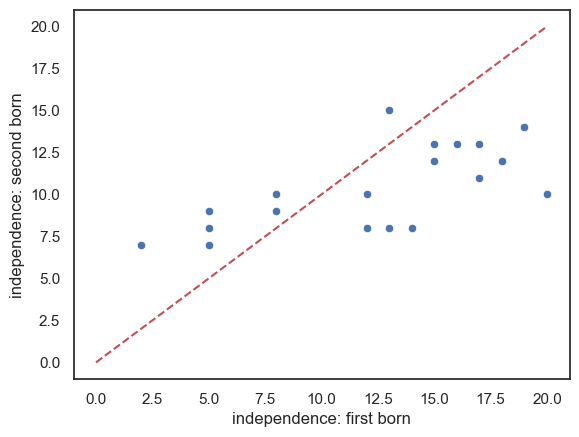

In [3]:
sns.scatterplot(data = birthOrder, x="FirstBorn", y="SecondBorn")
plt.xlabel("independence: first born")
plt.ylabel("independence: second born")

# add the line x=y (ie a line from point(50,50) to (110,110)) for reference 
plt.plot([0,20],[0,20],'r--')

Comments:
    
<ul>
<li>There is some correlation in independeence between first- and second-borns (independent first borns have independent second-born siblings)
<li> There are slightly more sibling pairs where the first-born is the more independent (points lying below the line x=y)
<li> It looks like in families with higher independence scores, the first-born is more indepenent than the second-born but for families with lower independednce scores, the opposite is true
</ul>

### Check the data distribution

In the case of paired data, we are interested in the distribution of *differences* within pairs.

Let's add a column to our dataframe to contain the differences

In [4]:
birthOrder['Diff'] = birthOrder.FirstBorn - birthOrder.SecondBorn
birthOrder

,FirstBorn,SecondBorn,Diff
0,12,10,2
1,18,12,6
2,13,15,-2
3,17,13,4
4,8,9,-1
5,15,12,3
6,16,13,3
7,5,8,-3
8,8,10,-2
9,12,8,4


Now let's plot the differences to get a sense of whether they are normally distributed.

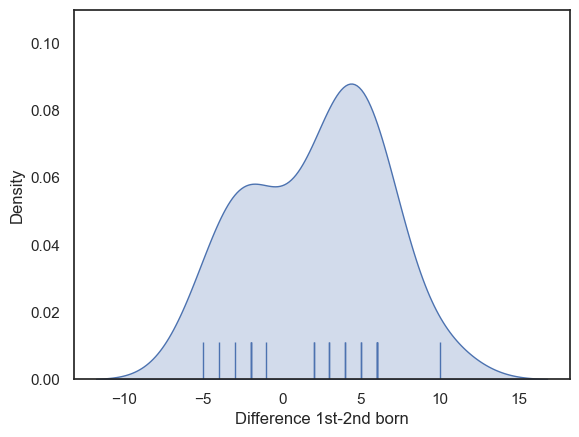

In [5]:
sns.kdeplot(data=birthOrder, x='Diff',  color='b', fill=True)
sns.rugplot(data=birthOrder, x='Diff', height=0.1, color='b')
plt.xlabel('Difference 1st-2nd born')
plt.show()

The distribution hasa  hint of bimodaility, with a hint of bimodality (two peaks).

### Hypotheses

$\mathcal{H_o}$: the median difference in independence between first- and second-born siblings is is zero

$\mathcal{H_a}$: the median difference in independence is not zero
    
This is a two-tailed test as the researcher's hypothesis (described above) is not directional.

We will test at the $\alpha = 0.05$ significance level

## Descriptive statistics

We obtain some relevant descriptive statistics. 

Since we are testing for a difference of medians, we will want the median for each group; it would also be useful to have a measure of spread, and the sample size.

In [6]:
birthOrder.describe()

,FirstBorn,SecondBorn,Diff
count,20.000000,20.000000,20.000000
mean,12.600000,10.450000,2.150000
std,5.364601,2.438183,4.120232
min,2.000000,7.000000,-5.000000
25%,8.000000,8.000000,-2.000000
50%,13.500000,10.000000,3.000000
75%,17.000000,12.250000,5.250000
max,20.000000,15.000000,10.000000


### Carry out the test

We carry out the test using the function <tt>wilcoxon</tt> from <tt>scipy.stats</tt>, here loaded as <tt>stats</tt>

In [7]:
stats.wilcoxon(birthOrder.FirstBorn,birthOrder.SecondBorn,alternative='two-sided')
#help(stats.wilcoxon)

WilcoxonResult(statistic=np.float64(46.0), pvalue=np.float64(0.027054512277951213))

The inputs to `stats.wilcoxon()` are:

* the two samples to be compared (the values of <tt>FirstBorn</tt> and <tt>SecondBorn</tt> from our Pandas data frame <tt>birthOrder</tt>)
* the argument `alternative='greater'`, which tells the computer to run a one tailed test  that median of the first input (FirstBorn) is greater than the second (SecondBorn).
    
The outputs are a value of the test statistic ($T=46$) and <tt>pvalue</tt> ($p=0.0266$) - if this is less than our $\alpha$ value 0.5, there is a significant difference.

More explanation of how T is calculated below.

### Draw conclusions

As the p value of 0.0266 is less than our alpha value of 0.05, the test is significant. 

We can conclude that the median difference in idenpendence is positive, ie the first borns are more independent

### How the Wilcoxon Sign-Rank test works

The mechanism of the test but is similar in principle to the ranksum test, except that here we work with ranked *differences*.


### How to do the test (if you were doing it with pencil and paper)

1. Obtain the difference (in independence score) for each pair

1. Rank the differences regardless of sign (e.g. a difference of +4 is greater than a difference of -3, which is greater than a difference of +2). Remove pairs with zero difference

1. Calculate the sum of ranks assigned to pairs with a positive difference (first-born more independent than second-born) - this is $R+$
1. Calculate the sum of ranks assigned to pairs with a negative difference (first-born more independent than second-born) - this is $R-$

1. The test statistic $T$ is either:
    * $R+$ if we expect positive differences to have the larger ranks (in this case, that equates to expecting first-borns to have higher scores)
    * $R-$  if we expect negative differences to have the larger ranks (in this case, that equates to expecting second-borns to have higher scores)
    * The smaller of $R+$ and $R-$ for a two tailed test (as in the example, we have no a-prior hypothesis about direction of effect)

1. $T$ is compared with a null distribution (the expected distribubtion of $T$ obtained in samples drawn from a population in which there is no true difference between groups)


We will not build code to do this here, although if you are feeling brave you are welcome to have a try yourself, using the between groups rank sum test as a model. 
